In [44]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [45]:
data_path = "emails.csv"
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [46]:
message_dataset.shape

(5728, 2)

<AxesSubplot:>

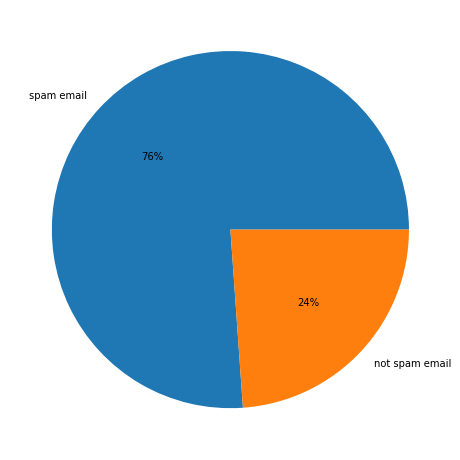

In [47]:
plt.rcParams["figure.figsize"] = [8,10]
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%', labels=["spam email", "not spam email"], ylabel='')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
message_dataset['text_without_sw'] = message_dataset['text'] .apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
